In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [4]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [5]:
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                     'DiabetesPedigreeFunction', 'Age']

In [8]:
scalar = StandardScaler()
scalar.fit(X_train[features_to_scale]) 


StandardScaler()

In [10]:
X_train[features_to_scale] = scalar.transform(X_train[features_to_scale])
X_test[features_to_scale] = scalar.transform(X_test[features_to_scale])

In [11]:
# Perform logistic regression (classification)

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
# Make prediction on testing set
y_test_pred = model.predict(X_test)

In [13]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
print(comparison[0:15])
print(comparison[100:0])


     Actual  Predicted
285       0          0
101       0          0
581       0          0
352       0          0
726       0          0
472       0          0
233       0          0
385       0          0
556       0          0
59        0          0
756       0          0
341       0          0
445       1          1
614       1          1
371       0          0
Empty DataFrame
Columns: [Actual, Predicted]
Index: []


In [14]:
# Calculate accuracy (using accuracy_score for classification)
accuracy = accuracy_score(y_test,y_test_pred) 
print(f'Accuracy:{accuracy:.4f}')

Accuracy:0.7792


In [15]:
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[89 10]
 [24 31]]


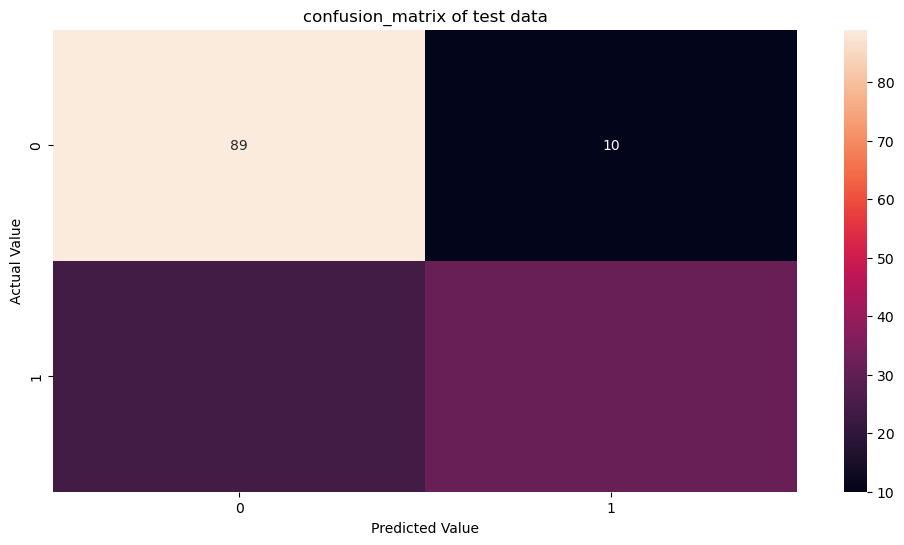

In [17]:
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix, annot=True, fmt = 'd') 
plt.title("confusion_matrix of test data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")  
plt.show() 

In [18]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [19]:
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]

In [20]:
recall = TP/(TP + FN)
print("Recall:", recall)

precision = TP/(TP + FP)
print("Precision:", precision)

specificity = TN/(TN + FP)
print("specificity:", specificity)

accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

Recall: 0.5636363636363636
Precision: 0.7560975609756098
specificity: 0.898989898989899
Accuracy: 0.7792207792207793


In [21]:
# Make new predictions
print("*** Making predictions for new data***")

new_data = np.array([
    [9,160,70,20,80,28,0.5,34],
    [0,104,70,15,0,21,0.1,29],
    [2,158,90,0,0,31.6,1.072,66],
    [1,100,66,15,56,23.6,0.666,26]
])

*** Making predictions for new data***


In [22]:
# Assuming you have unseen data as a numpy array new data
new_data_df = pd.DataFrame(data = new_data, columns=X_train.columns)


In [23]:
new_data_df = new_data_df.fillna(0)
print(new_data_df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    160.0           70.0           20.0     80.0  28.0   
1          0.0    104.0           70.0           15.0      0.0  21.0   
2          2.0    158.0           90.0            0.0      0.0  31.6   
3          1.0    100.0           66.0           15.0     56.0  23.6   

   DiabetesPedigreeFunction   Age  
0                     0.500  34.0  
1                     0.100  29.0  
2                     1.072  66.0  
3                     0.666  26.0  


In [24]:
#Scale and predict
new_data_scaled = scalar.transform(new_data_df)
print(new_data_scaled)

[[ 1.51659096  1.22468484  0.05772256  0.01130532  0.0082768  -0.50265921
   0.11068714  0.0594845 ]
 [-1.14225474 -0.54551709  0.05772256 -0.30421584 -0.67847404 -1.42077969
  -1.11219917 -0.36422177]
 [-0.55140014  1.16146334  1.07178992 -1.25077932 -0.67847404 -0.03048297
   1.85941457  2.77120462]
 [-0.84682744 -0.67196009 -0.14509091 -0.30421584 -0.19774845 -1.07976351
   0.61818496 -0.61844554]]


In [25]:
# Column names
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
                     'DiabetesPedigreeFunction', 'Age']

In [26]:
# Create a dataframe (Otherwise we will get warning)

predict_df = pd.DataFrame(new_data_scaled,columns=column_names)
print(predict_df)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     1.516591  1.224685       0.057723       0.011305  0.008277 -0.502659   
1    -1.142255 -0.545517       0.057723      -0.304216 -0.678474 -1.420780   
2    -0.551400  1.161463       1.071790      -1.250779 -0.678474 -0.030483   
3    -0.846827 -0.671960      -0.145091      -0.304216 -0.197748 -1.079764   

   DiabetesPedigreeFunction       Age  
0                  0.110687  0.059484  
1                 -1.112199 -0.364222  
2                  1.859415  2.771205  
3                  0.618185 -0.618446  


In [27]:
prediction = model.predict(predict_df)
print(prediction)

[1 0 1 0]


In [28]:
# Saving Model (and anything else as pickle file)

import joblib
joblib.dump(model,'final_diabetes.pkl')
joblib.dump(list(X.columns),'diabetes_column_names.pkl')

['diabetes_column_names.pkl']

In [30]:
# Loading model

col_names = joblib.load('diabetes_column_names.pkl')
loaded_model = joblib.load('final_diabetes.pkl')

In [31]:
# Make new prediction using the loaded model

new_data = np.array([
    [12,200,99,18,90,30,0.7,44],
    [0,82,71,16,0,19,0.1,27]
])

In [32]:
# Assuming you have unseen data as a numpy array new data
new_data_df = pd.DataFrame(data = new_data, columns=X_train.columns)

In [33]:
new_data_df = new_data_df.fillna(0)
print(new_data_df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0         12.0    200.0           99.0           18.0     90.0  30.0   
1          0.0     82.0           71.0           16.0      0.0  19.0   

   DiabetesPedigreeFunction   Age  
0                       0.7  44.0  
1                       0.1  27.0  


In [34]:
#Scale and predict
new_data_scaled = scalar.transform(new_data_df)
print(new_data_scaled)

[[ 2.40287287  2.48911479  1.52812023 -0.11490315  0.09412066 -0.24033908
   0.7221303   0.90689704]
 [-1.14225474 -1.24095356  0.10842593 -0.24111161 -0.67847404 -1.68309982
  -1.11219917 -0.53370428]]


In [35]:
predict_df = pd.DataFrame(new_data_scaled,columns=column_names)
print(predict_df)
prediction = loaded_model.predict(predict_df)
print(prediction)

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     2.402873  2.489115       1.528120      -0.114903  0.094121 -0.240339   
1    -1.142255 -1.240954       0.108426      -0.241112 -0.678474 -1.683100   

   DiabetesPedigreeFunction       Age  
0                  0.722130  0.906897  
1                 -1.112199 -0.533704  
[1 0]
